<a href="https://colab.research.google.com/github/IT-kakaya/Progect-for-ML-School/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%A1%D1%82%D0%B5%D0%BF%D0%B8%D0%BA_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/IT-kakaya/Progect-for-ML-School.git

fatal: destination path 'Progect-for-ML-School' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv('/content/Progect-for-ML-School/winequality-white.csv', delimiter=";")
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
44,6.7,0.230,0.26,1.4,0.060,33.0,154.0,0.99340,3.24,0.56,9.5,6
249,6.1,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
3315,5.8,0.180,0.37,1.2,0.036,19.0,74.0,0.98853,3.09,0.49,12.7,7
946,8.2,0.345,1.00,18.2,0.047,55.0,205.0,0.99965,2.96,0.43,9.6,5
1089,7.0,0.170,0.33,4.0,0.034,17.0,127.0,0.99340,3.19,0.39,10.6,7


In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


Для данного проекта был выбран датасет, включающий себя химические характеристики вина, на основе которых нам нужно будет предсказывать значения стобца 'quality' - оценки потребителя.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Мы вывели основную информацию о датафрейме. У нас нет пропусков в данных (во всех колонках одинакое количество строк, non-null). Все данные имеют численный вид, никаких изменений проводить не нужно

Проверим значения на выбросы.
Выбросы будем смотреть с помощью ящика с усами и функции describe.

<Axes: >

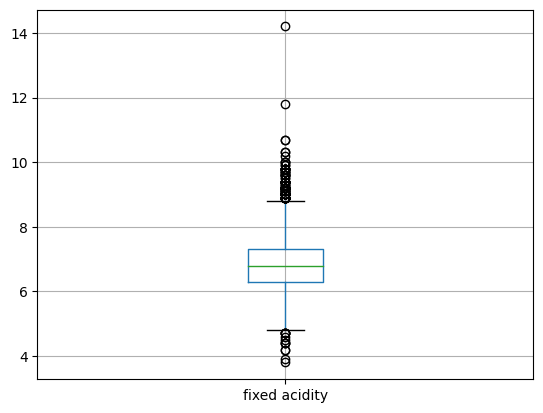

In [ ]:
df.boxplot(column=['fixed acidity']) 

Как мы видим, в колонке, отвечающей за фиксированную кислотность, есть выбросы.

In [ ]:
df['fixed acidity'].describe()

count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed acidity, dtype: float64

Фиксированная кислотность вина не может быть выше 10.Соответсвенно, удаляем вина, в значениях которых есть отклонения.

In [ ]:
df = df[df['fixed acidity'] < 10]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
df['fixed acidity'].describe()

count    4888.000000
mean        6.846676
std         0.823523
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max         9.900000
Name: fixed acidity, dtype: float64

<Axes: >

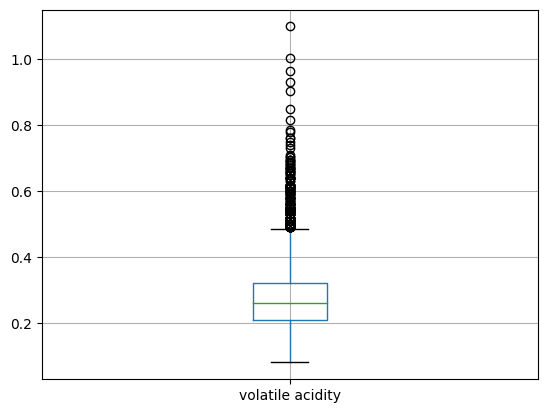

In [ ]:
df.boxplot(column=['volatile acidity'])

In [ ]:
df['volatile acidity'].describe()

count    4888.000000
mean        0.278168
std         0.100435
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile acidity, dtype: float64

В колонке, отвечающей за летучую кислотность, есть выбросы. Однако значения находятся в пределах нормы.

<Axes: >

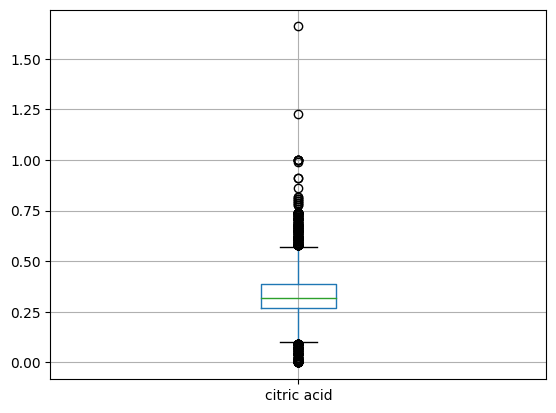

In [ ]:
df.boxplot(column=['citric acid']) 

In [ ]:
df['citric acid'].describe()

count    4888.000000
mean        0.333873
std         0.120737
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

В колонке, отвечающей за лимонную кислотность есть выбросы, но они также находятся в пределах допустимых значениях. Однако лимонная кислотность в любом вине всегда больше 0,1, поэтому удалим ненужные значения.


In [ ]:
df = df[df['citric acid'] > 0.1]
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [ ]:
df['citric acid'].describe()

count    4789.000000
mean        0.339735
std         0.114694
min         0.110000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

<Axes: >

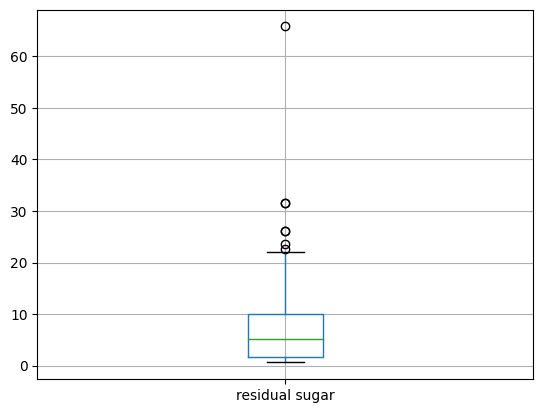

In [ ]:
df.boxplot(column=['residual sugar']) 

In [ ]:
df['residual sugar'].describe()

count    4789.000000
mean        6.446972
std         5.083213
min         0.600000
25%         1.700000
50%         5.200000
75%        10.000000
max        65.800000
Name: residual sugar, dtype: float64

В колонке, отвечающей за остаточный сахар, показатели в пределах существующих, хоть и имеются выбросы(в данном случае они ни на что не влияют)

In [ ]:
df['chlorides'].describe()

count    4789.000000
mean        0.045825
std         0.021997
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

В колонке отвечающей за хлорид нет значений, которые не вписываются в норму

In [ ]:
df['free sulfur dioxide'].describe()

count    4789.000000
mean       35.481103
std        17.035646
min         2.000000
25%        24.000000
50%        34.000000
75%        46.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

In [ ]:
df['total sulfur dioxide'].describe()

count    4789.000000
mean      138.835978
std        42.450039
min        10.000000
25%       109.000000
50%       134.000000
75%       168.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

In [ ]:
df['density'].describe()

count    4789.000000
mean        0.994047
std         0.003000
min         0.987110
25%         0.991720
50%         0.993800
75%         0.996200
max         1.038980
Name: density, dtype: float64

In [ ]:
df['pH'].describe()

count    4789.000000
mean        3.187081
std         0.150184
min         2.740000
25%         3.080000
50%         3.180000
75%         3.280000
max         3.820000
Name: pH, dtype: float64

In [ ]:
df['alcohol'].describe()

count    4789.000000
mean       10.518820
std         1.231358
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

In [ ]:
df['quality'].describe()

count    4789.000000
mean        5.892671
std         0.879170
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

В колонках, отвечающих за диоксид серы в вине, плотность вина, а также pH уровень,количество градусов и оценку каечства вина, нет отклоняющихся от нормы значений.

Добавим новый признак на основе колонки 'residual sugar', которая показывает количество остаточного сахара в вине. Соответсвенно, если показатель остаточного сахара меньше 25г/л, то вино можно отнести к сухому или полусухому вину. Если же показатель больше 25г/л, то вино можно отнести к сладкому или полусадкому. Сухие и полусухие вина имеют сухой вкус, обозначим это за '0'. Сладкие и полусладкие вина имеют сладкий привкус, обозначим это за '1'.

In [ ]:
df.insert (loc= len(df.columns) , column='Sweetness', value='')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Sweetness
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,


In [ ]:
df.loc[df['residual sugar'] < 25, 'Sweetness'] = 0
df.loc[df['residual sugar'] > 25, 'Sweetness'] = 1
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Sweetness
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
df['Sweetness'].describe()

count     4789
unique       2
top          0
freq      4784
Name: Sweetness, dtype: int64

PLOT.BAR

In [ ]:
helper = df.pivot_table(index = 'quality', values = 'alcohol', aggfunc = 'mean')
helper = helper.iloc[-10:]
helper

,alcohol
quality,
3,10.422222
4,10.183681
5,9.802687
6,10.574846
7,11.360336
8,11.630636
9,12.180000


<Axes: xlabel='quality'>

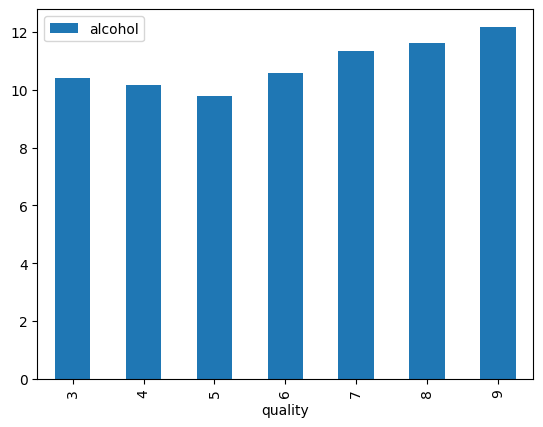

In [ ]:
helper.plot.bar()

По данному графику мы можем увидеть взаимосвязь оценок потребителей вина и процент градуса вина. Если мы рассматриваем график при градусах вина больше, чем 9,8, то оценки потребителей начинают увеличиваться. Однако увеличение в данном случае является незначительным.

ЛИНЕЙНЫЙ ГРАФИК

In [ ]:
helper2 = df.pivot_table(index = 'pH', values = 'sulphates', aggfunc = 'mean')
helper2 = helper2.iloc[-20:]
helper2

,sulphates
pH,
3.59,0.475000
3.60,0.472857
3.61,0.566667
3.62,0.810000
3.63,0.638000
3.64,0.540000
3.65,0.712500
3.66,0.516000
3.67,0.570000


<Axes: xlabel='pH'>

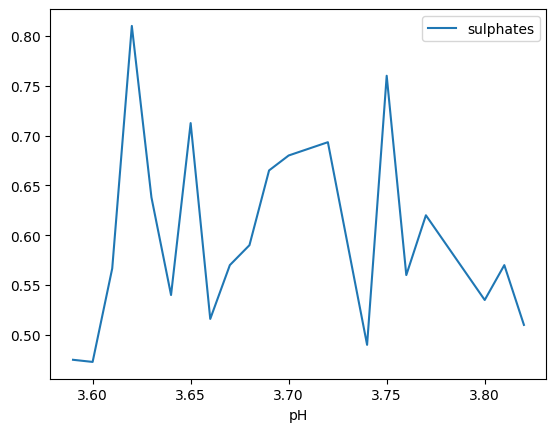

In [ ]:
helper2.plot()

По графику мы видим, что никаких взаимосвязей между уровнем pH и количеством сульфатов в вине нет.
Однако в среднем мы видим, что максимальное количество сульфатов находися в вине с наименьшим уровнем pH, а наименьшее количество сульфатов - при большем уровне pH. Это свидетельсвует о том, что сульфаты в данных винах не приводят к образованию сернистой кислоты, соотвественно, это не меняет вкус вина и не уменьшает срок его хранения. Так как именно при большом уровне pH сульфаты могут негативно сказываться на качестве вина.

**Часть 2. Модели**

Будем предсказывать значения из колонки 'quality' на основе остальных значений. Для этого посмотрим все уникальные значения этой колонки.

In [ ]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

Разделим датасет на y - предсказываемое значение, и X - остальные значения.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['quality']
X = df.drop(columns=['quality'])

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Sweetness
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


Разделим выборку на обучающую, валидационную и тестовую

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.70, random_state = 1)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.15, random_state = 1)

In [ ]:
X_val

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Sweetness
3058,6.2,0.25,0.38,7.9,0.045,54.0,208.0,0.99572,3.17,0.46,9.1,0
2990,5.0,0.27,0.32,4.5,0.032,58.0,178.0,0.98956,3.45,0.31,12.6,0
1882,7.7,0.30,0.42,14.3,0.045,45.0,213.0,0.99910,3.18,0.63,9.2,0
569,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0
4350,7.0,0.36,0.25,5.7,0.015,14.0,73.0,0.98963,2.82,0.59,13.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3608,7.0,0.16,0.25,14.3,0.044,27.0,149.0,0.99800,2.91,0.46,9.2,0
1976,6.8,0.28,0.37,7.0,0.057,35.0,208.0,0.99730,3.57,0.55,10.2,0
572,6.7,0.34,0.54,16.3,0.047,44.0,181.0,0.99870,3.04,0.56,8.8,0
176,7.2,0.32,0.47,5.1,0.044,19.0,65.0,0.99100,3.03,0.41,12.6,0


Рассмотрим первую предсказывающую модель - Линейную регрессию

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
new_model = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = new_model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
mape = mean_absolute_percentage_error(y_val, y_pred)
print('mse: %.3f, mae: %.3f, mape: %.3f' % (mse, mae, mape))

mse: 0.599, mae: 0.598, mape: 0.105


In [ ]:
y_pred

array([5.48515391, 6.82349896, 5.6466532 , ..., 5.49884824, 6.33894099,
       6.2225716 ])

In [ ]:
xx =[]
for i in range(0, 20):
  xx.append(i)
xx

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

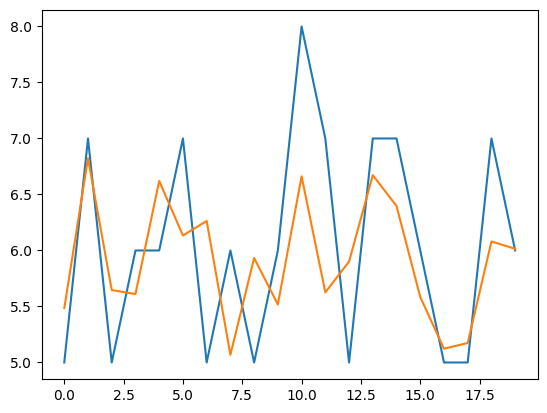

In [ ]:
plt.plot(xx, y_val[0:20]) #синий
plt.plot(xx, y_pred[0:20]) #оранжевый

Из оценки данной модели можем сделать вывод. Показатель MAPE определяет среднюю абсолютную процентную ошибку. То есть модель ошибается на 10,5%. Это небольшая погрешность. Однако, это среднее значение. А это значит, что точную оценку наша модель угадывает редко. Хотя MAE = 0.598, что означает что средняя абсолютная ошибка меньше единицы. Это большой плюс для нашей модели.

Далее построем лес решений и оценим его работу

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
model_ranfor = RandomForestClassifier(n_estimators=30)
model_ranfor.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [ ]:
from sklearn.metrics import accuracy_score as accuracy

In [ ]:
preds_train = model_ranfor.predict(X_train)
preds_val = model_ranfor.predict(X_val)

print("Точность на обучении:", accuracy(y_train, preds_train))
print("Точность на валидационной выборке:", accuracy(y_val, preds_val))

Точность на обучении: 0.9997016706443914
Точность на валидационной выборке: 0.665028665028665


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, preds_val, average='macro'))

Точность на валидационной выборке f1: 0.4104132142662516


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, preds_val, average='micro'))

Точность на валидационной выборке f1: 0.665028665028665


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, preds_val, average='weighted'))

Точность на валидационной выборке f1: 0.6568438244107381


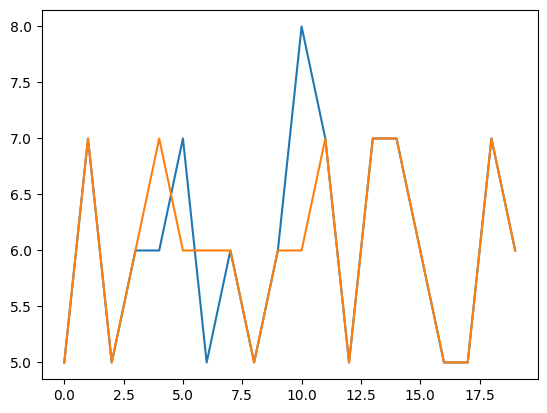

In [ ]:
plt.plot(xx, y_val[0:20]) #синий
plt.plot(xx, preds_val[0:20]) #оранжевый

Точность модели невысокая, однако значение 0,65 выше 0,5, поэтому оценим этот результат как средний. Также, по графику видно, что есть совпадающие значения. Показатели f1 дают разную оценку в зависимости от выбранного типа среднего. Будем ориентироваться на результат micro, потому что, по моему мнению, он наиболее точно определяет оценку (за счет домножения на долю в выборке).






Далее построим модель логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predicted = model.predict(X_val)

In [ ]:
print("Точность на валидационной выборке:", accuracy(y_val, predicted))

Точность на валидационной выборке: 0.4954954954954955


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, predicted, average='macro'))

Точность на валидационной выборке f1: 0.15448599245691938


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, predicted, average='micro'))

Точность на валидационной выборке f1: 0.4954954954954955


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, predicted, average='weighted'))

Точность на валидационной выборке f1: 0.414808136321747


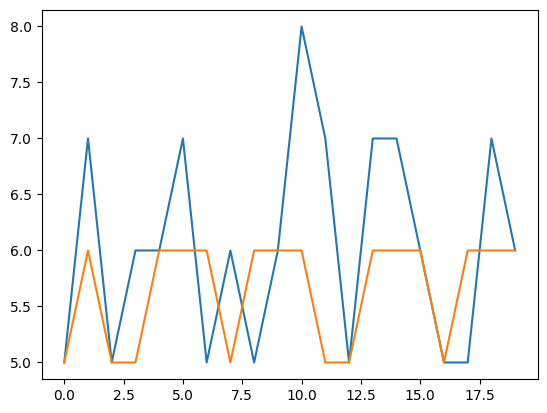

In [ ]:
plt.plot(xx, y_val[0:20]) #синий
plt.plot(xx, predicted[0:20]) #оранжевый

Опираясь на оценки данной модели, можно сказать, что она работает менее эффективно. Все оценки ниже 0,5. А по графику можно сказать, что модель занижает значения

Теперь перейдем к методу опорных векторов

In [ ]:
model2 = SVC()
model2.fit(X_train, y_train)

SVC()

In [ ]:
predicted2 = model2.predict(X_val)

In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, predicted2, average='macro'))

Точность на валидационной выборке f1: 0.10550840425193475


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, predicted2, average='micro'))

Точность на валидационной выборке f1: 0.4430794430794431


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, predicted2, average='weighted'))

Точность на валидационной выборке f1: 0.31208787271795874


In [ ]:
print("Точность на валидационной выборке:", accuracy(y_val, predicted2))

Точность на валидационной выборке: 0.4430794430794431


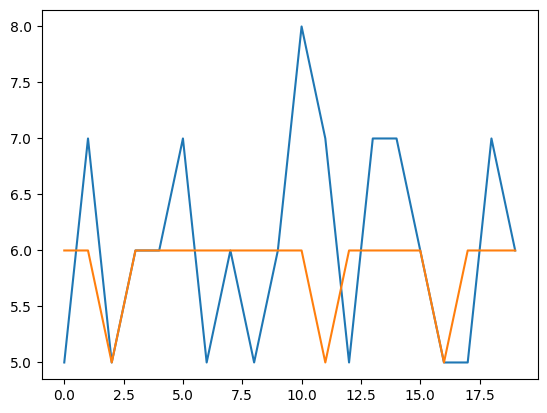

In [ ]:
plt.plot(xx, y_val[0:20]) #синий
plt.plot(xx, predicted2[0:20]) #оранжевый

Метод опорных векторов делает предсказания хуже логистической регрессии. Все оценки ниже 0,5. А оценка f1 с параметром macro вообще приближается к 0. По графику видно, что предсказания сильно отличаются от реальных значений

Последней моделью, которую мы применем, будет дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(
          max_depth=20,
          random_state=1)

In [ ]:
tree = tree.fit(X_train, y_train)

In [ ]:
y_test_pred = tree.predict(X_val)

In [ ]:
print("Точность на валидационной выборке:", accuracy(y_val, y_test_pred))

Точность на валидационной выборке: 0.5937755937755937


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, y_test_pred, average='weighted'))

Точность на валидационной выборке f1: 0.5922061016170848


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, y_test_pred, average='macro'))

Точность на валидационной выборке f1: 0.36048019739339493


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, y_test_pred, average='micro'))

Точность на валидационной выборке f1: 0.5937755937755937


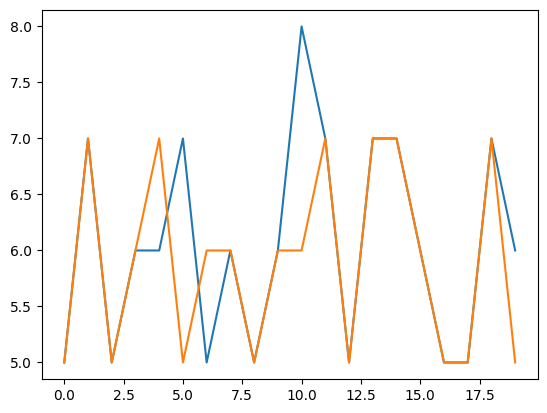

In [ ]:
plt.plot(xx, y_val[0:20]) #синий
plt.plot(xx, y_test_pred[0:20]) #оранжевый

Модель работает неплохо. Показатели оценки точности модели превышают 0.5. По графику видно, что многие значения предсказываются верно



**Общий вывод:** **наиболее точной моделью оказалась модель линейной регрессии. Однако ее предсказания неточные, а близкие к истиннным. Вторая по успешности модель - лес решений. Точночть данной модели более 50%. А также дерево решений показало хороший резкльтат. Остлальные модели работают слабо. Можно предположить, что такие низкие результаты наблюдаются по причине того, что оценка потребтеля (quality) не всегда основывается на качественных показателях напитка, поэтому связь между признаками и таргетом не настолько сильная. ** Протестируем эти три модели на тестовой выборке:

In [ ]:
test_y_pred = new_model.predict(X_test) #Для линейной регрессии

In [ ]:
mse = mean_squared_error(y_test, test_y_pred)
mae = mean_absolute_error(y_test, test_y_pred)
mape = mean_absolute_percentage_error(y_test, test_y_pred)
print('mse: %.3f, mae: %.3f, mape: %.3f' % (mse, mae, mape))

mse: 0.650, mae: 0.625, mape: 0.113


In [ ]:
test_preds = model_ranfor.predict(X_test) #Для леса решений

In [ ]:
print("Точность на тесте:", accuracy(y_test, test_preds))
print("Точность на тесте f1:", f1_score(y_val, y_test_pred, average='weighted'))
print("Точность на тесте f1:", f1_score(y_val, y_test_pred, average='macro'))
print("Точность на тесте f1:", f1_score(y_val, y_test_pred, average='micro'))

Точность на тесте: 0.6342592592592593
Точность на тесте f1: 0.5922061016170848
Точность на тесте f1: 0.36048019739339493
Точность на тесте f1: 0.5937755937755937


In [ ]:
test_y_test_pred = tree.predict(X_test) #Для дерева решений

In [ ]:
print("Точность на тесте:", accuracy(y_test, test_y_test_pred))
print("Точность на тесте f1:", f1_score(y_val, y_test_pred, average='weighted'))
print("Точность на тесте f1:", f1_score(y_val, y_test_pred, average='macro'))
print("Точность на тесте f1:", f1_score(y_val, y_test_pred, average='micro'))

Точность на тесте: 0.5879629629629629
Точность на тесте f1: 0.5922061016170848
Точность на тесте f1: 0.36048019739339493
Точность на тесте f1: 0.5937755937755937


Результаты тестов приблизительно такие же как на валидационной выборке

Приложение. 
Написанная логическая регрессия с нуля и ее оценка

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth   
        self.min_samples_split = min_samples_split 

    def fit(self, X:np.array, y:np.array):
        self.n_classes_ = len(np.unique(y)) 
        self.num_features = X.shape[1]
        self.tree_ = self._plant_tree(X, y) 

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):

        num_of_y = y.size 
        if num_of_y <= 1:
            return None, None
        

        num_of_each_class = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0
        best_idx, best_thr = None, None
        
        for idx in range(self.num_features):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
    
            num_left = [0] * self.n_classes_
            num_right = num_of_each_class.copy()

            for i in range(1, num_of_y):
                class_ = classes[i - 1]
                num_left[class_] += 1
                num_right[class_] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.n_classes_))
                gini_right = 1.0 - sum((num_right[x] / (num_of_y - i)) ** 2 for x in range(self.n_classes_))
                gini = (i * gini_left + (num_of_y - i) * gini_right) / num_of_y

                if thresholds[i] == thresholds[i - 1]:
                    continue

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        
        return best_idx, best_thr

    def _plant_tree(self, X, y, depth=0):

        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)

        node = Node(predicted_class=predicted_class)

        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                indices_right = X[:, idx] >= thr
                X_right, y_right = X[indices_right], y[indices_right]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._plant_tree(X_left, y_left, depth+1)
                node.left.leftbranch = True
                node.right = self._plant_tree(X_right, y_right, depth+1)
                node.right.rightbranch = True

        return node

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

class Node:
    def __init__(self, *, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [ ]:
y_train = y_train.replace(3, 0)
y_train = y_train.replace(4, 1)
y_train = y_train.replace(5, 2)
y_train = y_train.replace(6, 3)
y_train = y_train.replace(7, 4)
y_train = y_train.replace(8, 5)
y_train = y_train.replace(9, 6)

In [ ]:
y_val = y_val.replace(3, 0)
y_val = y_val.replace(4, 1)
y_val = y_val.replace(5, 2)
y_val = y_val.replace(6, 3)
y_val = y_val.replace(7, 4)
y_val = y_val.replace(8, 5)
y_val = y_val.replace(9, 6)

In [ ]:
y_test = y_test.replace(3, 0)
y_test = y_test.replace(4, 1)
y_test = y_test.replace(5, 2)
y_test = y_test.replace(6, 3)
y_test = y_test.replace(7, 4)
y_test = y_test.replace(8, 5)
y_test = y_test.replace(9, 6)

In [ ]:
tree = DecisionTree(max_depth=20, min_samples_split=2)
tree.fit(X_train.values, y_train.values)
y_pred = tree.predict(X_val.values)

In [ ]:
print("Точность на валидационной выборке:", accuracy(y_val, y_pred))

Точность на тесте: 0.5896805896805897


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, y_pred, average='weighted'))

Точность на обучении f1: 0.5890082227418751


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, y_pred, average='micro'))

Точность на обучении f1: 0.5896805896805897


In [ ]:
print("Точность на валидационной выборке f1:", f1_score(y_val, y_pred, average='macro'))

Точность на обучении f1: 0.3583925939068572


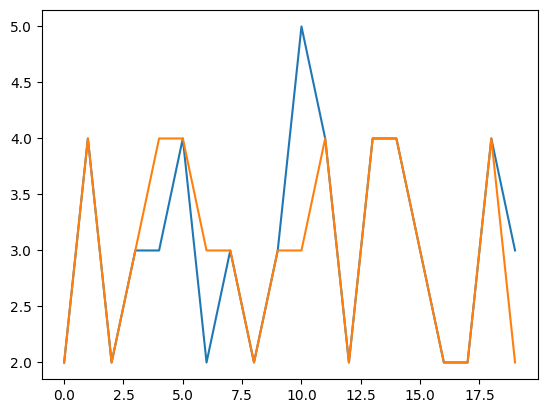

In [ ]:
plt.plot(xx, y_val[0:20]) #синий
plt.plot(xx, y_pred[0:20]) #оранжевый

Вывод: заметим, что обученная нами модель дает также хорошие результаты, как и готовая. Но предсказания, судя по графику немного отличаются.